In [17]:
library(arcgisbinding)
library(sf)
library(leaflet)
library(leaflet.esri)

In [2]:
arc.check_product()

product: ArcGIS Pro (12.9.1.32739)
license: Advanced
version: 1.0.1.244

In [11]:
feature_service <- 'https://services3.arcgis.com/oZfKvdlWHN1MwS48/arcgis/rest/services/King_County_House_Prices/FeatureServer/0'
arc.fs <- arc.open(feature_service)
house.price <- arc.select(arc.fs, sr=4326)

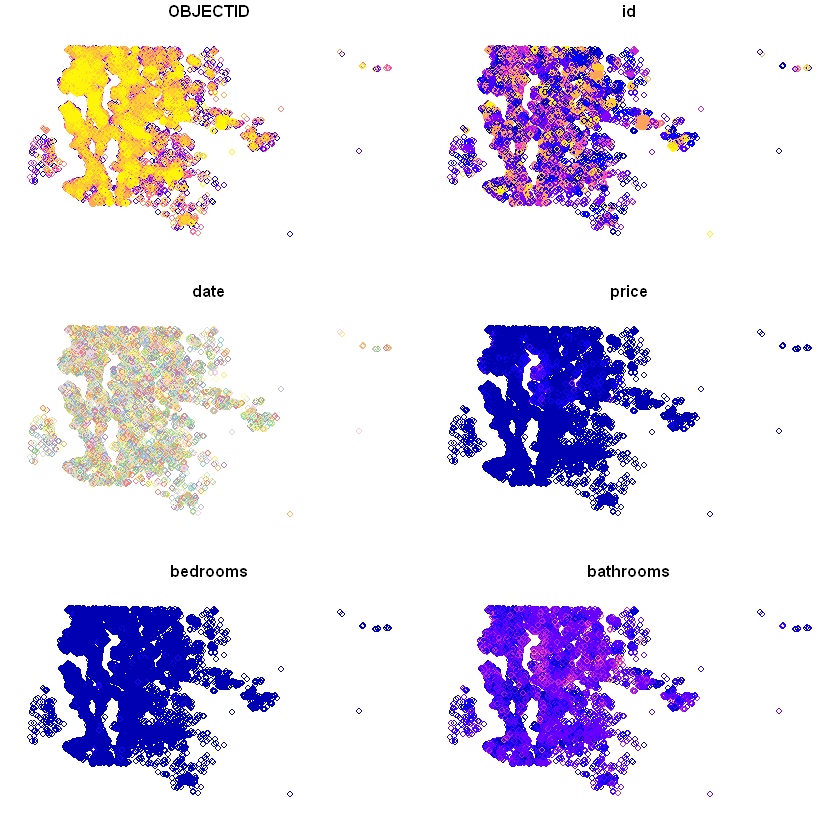

In [27]:
house.price.sp <- arc.data2sp(house.price)
house.price.sf <- st_as_sf(house.price.sp)
plot(house.price.sf, max.plot = 6)

In [28]:
renderer <- colorQuantile("RdYlBu", domain=house.price.sf$price, reverse=T, probs=c(0, 0.25, 0.5, 0.75, 1))

L<-leaflet(elementId='WA_map') %>%
  addProviderTiles(providers$Esri) %>%
  addCircleMarkers(data = house.price.sf, 
                   color=~renderer(house.price.sf$price), 
                   radius=5, 
                   label=~sprintf("Home Price: %s", house.price.sf)) %>%

  addLegend(pal = renderer, values = house.price.sf$price, title = "Home Price")
L

## What is wrong with this map?

HTML widgets cannot be represented in plain text (need html)

In [30]:
renderer <- colorQuantile("RdYlBu", domain=house.price.sf$price, reverse=T, probs=c(0, 0.25, 0.5, 0.75, 1))

L<-leaflet(elementId='WA_map') %>%
  addProviderTiles(providers$Esri) %>%
  addCircleMarkers(data = house.price.sf, 
                   color=~renderer(price), 
                   radius=5, 
                   label=~sprintf("Home Price: %s", price)) %>%

  addLegend(pal = renderer, values = house.price.sf$price, title = "Home Price")
L

HTML widgets cannot be represented in plain text (need html)